# NTL9

In [2]:
import pyemma
import numpy as np
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## Read data

### NTL9 is already featurized because of the dataset size

In [2]:
traj_files = [sorted(glob('/Volumes/Seagate55/work/DESRES/ntl9/NTL9-0-*.npy')), 
              sorted(glob('/Volumes/Seagate55/work/DESRES/ntl9/NTL9-1-*.npy')), 
              sorted(glob('/Volumes/Seagate55/work/DESRES/ntl9/NTL9-3-*.npy'))]

In [3]:
X = pyemma.coordinates.source(traj_files, chunksize=10000)

## tICA and k-means clustering using top-scoring model hyperparameters

In [4]:
### top model is: commute tICA mapping, 10 ns (50 frames) tICA lag time, 10 tICs, 200 microstates

In [5]:
tica = pyemma.coordinates.tica(X, lag=50, dim=10, kinetic_map=False, commute_map=True)

In [6]:
kmeans = pyemma.coordinates.cluster_kmeans(tica, k=200, max_iter=100)
dtrajs = kmeans.dtrajs

In [3]:
np.save('ntl9_dtrajs.npy', dtrajs)
#dtrajs = list(np.load('ntl9_dtrajs.npy', allow_pickle=True))

### In this notebook analyzing only maximum likelihood models for quick re-running. Analysis including errors with Bayesian MSMs, and choice of final lag time, is in the all_top_models_timescales.ipynb notebook.

## Timescales

In [4]:
its = pyemma.msm.its(dtrajs, 2000, errors='bayes')

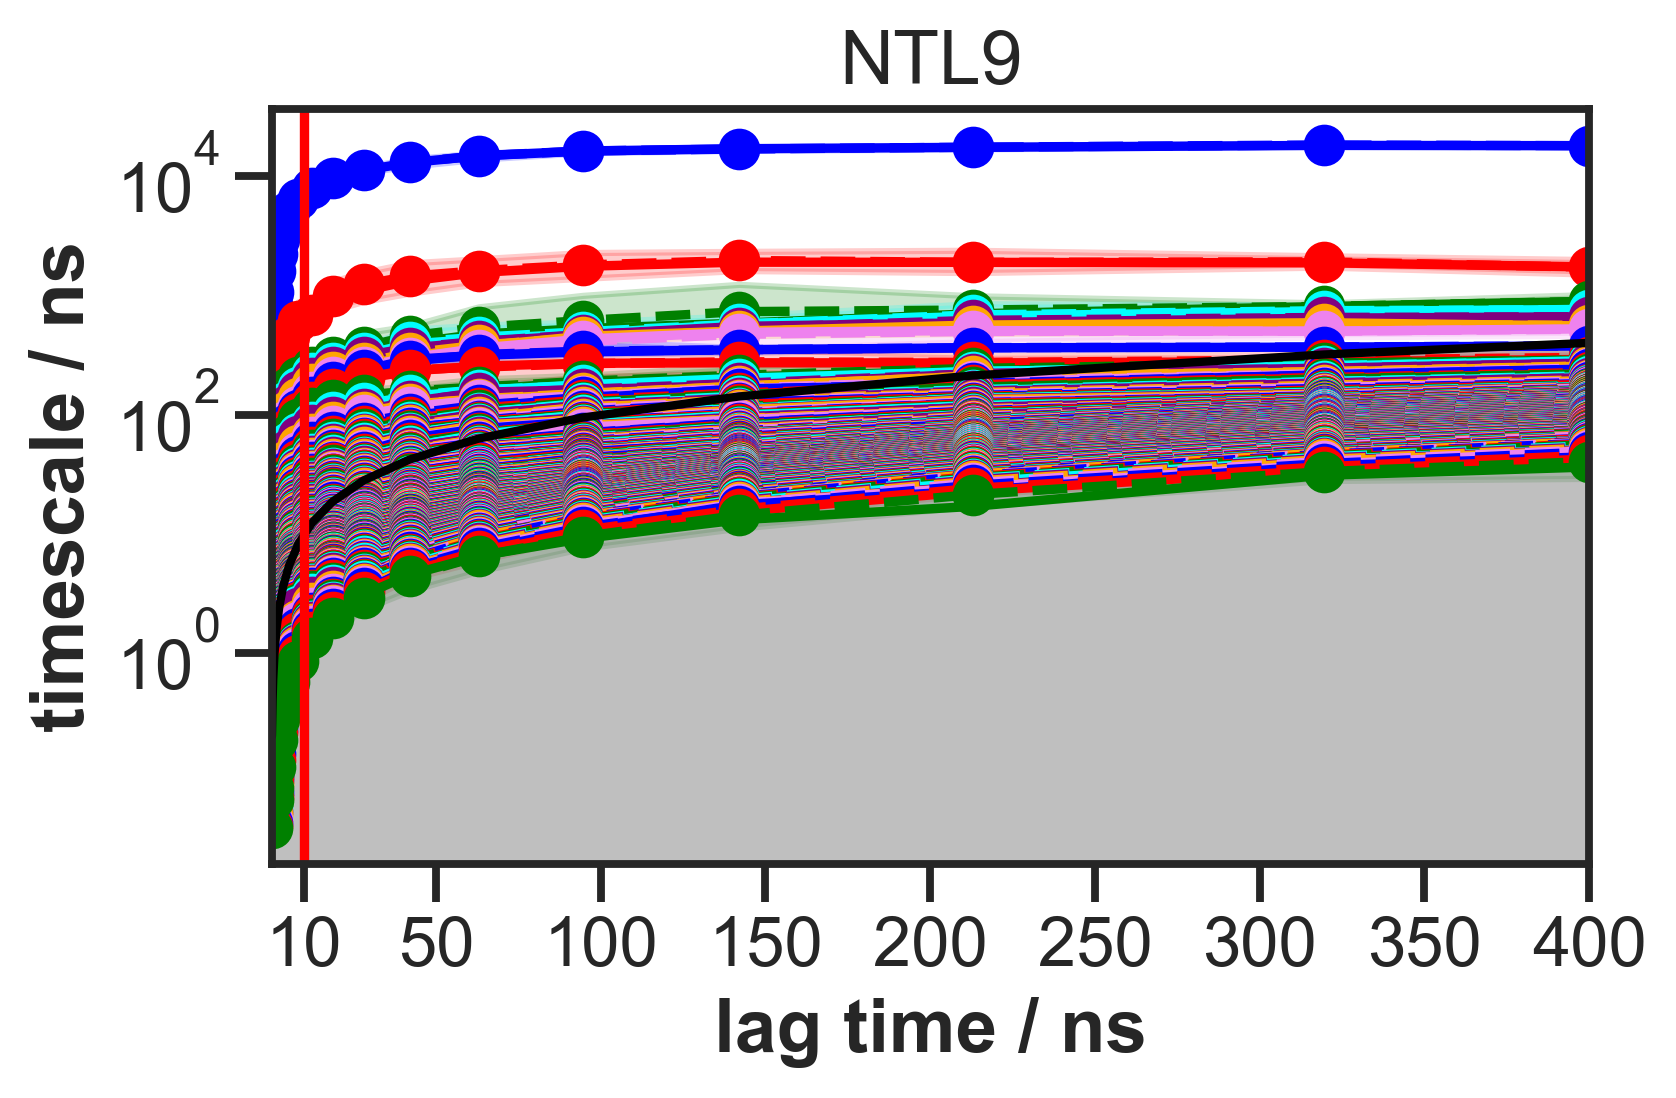

In [5]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=True, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('NTL9')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.xlabel('lag time / ns', weight='bold')
plt.ylabel('timescale / ns', weight='bold')
plt.tight_layout()
plt.savefig('ntl9_its_log.png', dpi=300)
plt.savefig('ntl9_its_log.pdf')

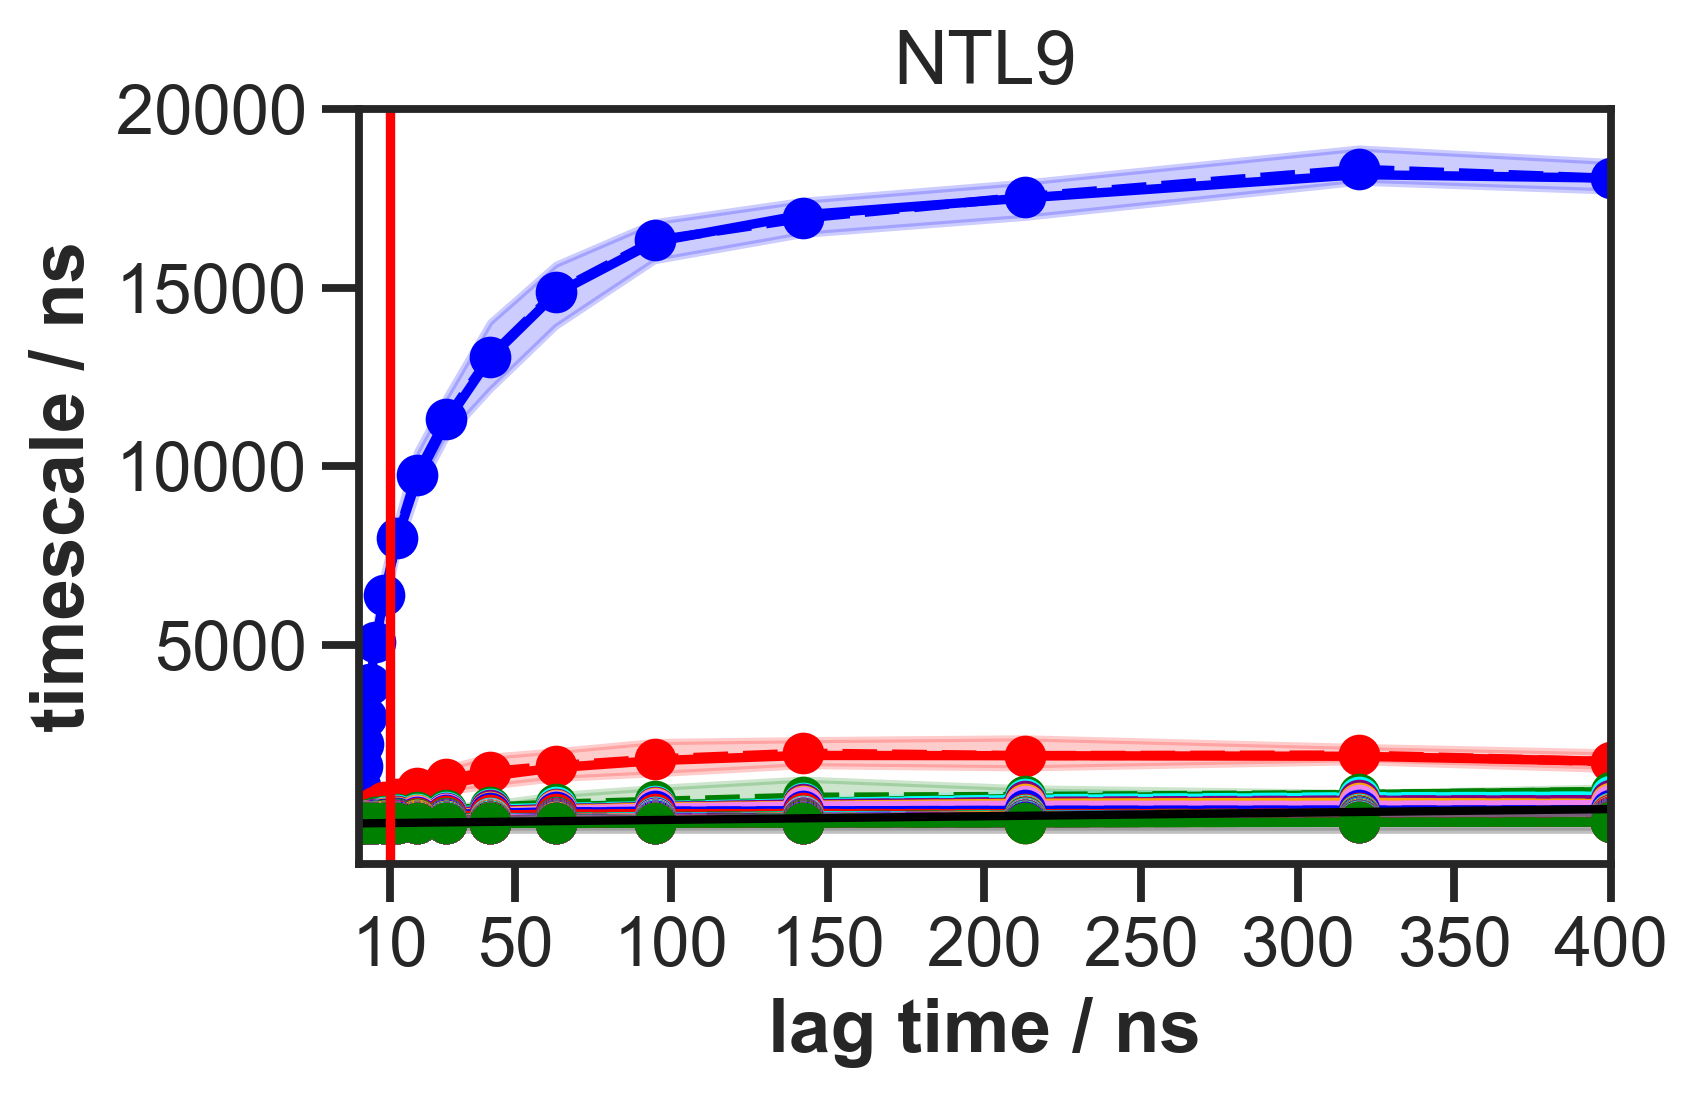

In [6]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('NTL9')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.yticks([5000, 10000, 15000, 20000])
plt.xlabel('lag time / ns', weight='bold')
plt.ylabel('timescale / ns', weight='bold')
plt.tight_layout()
plt.savefig('ntl9_its_lin.png', dpi=300)
plt.savefig('ntl9_its_lin.pdf')

## CK test

### lag 10 ns

In [7]:
#msm = pyemma.msm.bayesian_markov_model(dtrajs, 10*5)
msm = pyemma.msm.estimate_markov_model(dtrajs, 10*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 10000/10).astype('int'))

<Figure size 432x288 with 0 Axes>

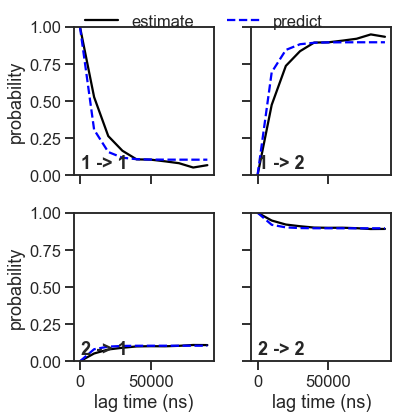

In [8]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag10ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag10ns.pdf')

In [9]:
ck_test = msm.cktest(2, mlags=(np.arange(10) * 1000/10).astype('int'))

<Figure size 432x288 with 0 Axes>

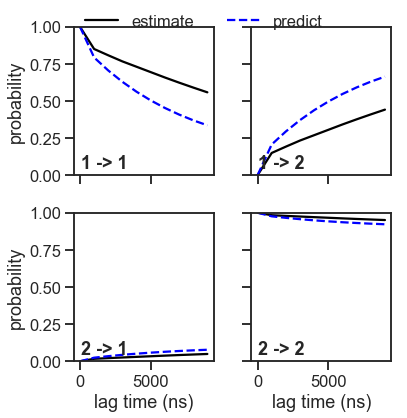

In [10]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag10ns_shortlags.png', dpi=300)
plt.savefig('ntl9_cktest_lag10ns_shortlags.pdf')

### lag 50 ns

In [11]:
#msm = pyemma.msm.bayesian_markov_model(dtrajs, 50*5)
msm = pyemma.msm.estimate_markov_model(dtrajs, 50*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 10000/50).astype('int'))

<Figure size 432x288 with 0 Axes>

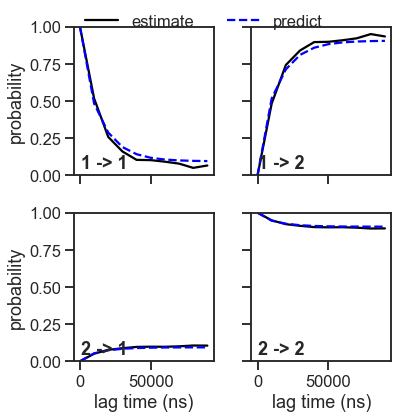

In [12]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag50ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag50ns.pdf')

In [13]:
ck_test = msm.cktest(2, mlags=(np.arange(10) * 1000/50).astype('int'))

<Figure size 432x288 with 0 Axes>

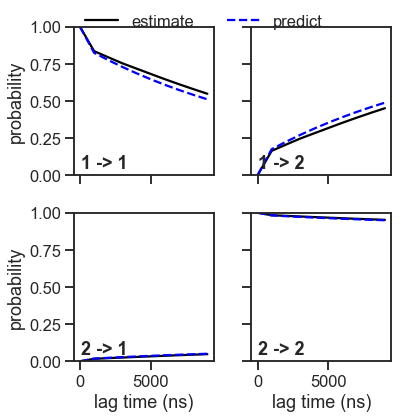

In [14]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag50ns_shortlags.png', dpi=300)
plt.savefig('ntl9_cktest_lag50ns_shortlags.pdf')

### lag 100 ns

In [20]:
#msm = pyemma.msm.bayesian_markov_model(dtrajs, 100*5)
msm = pyemma.msm.estimate_markov_model(dtrajs, 100*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 10000/100).astype('int'))

<Figure size 432x288 with 0 Axes>

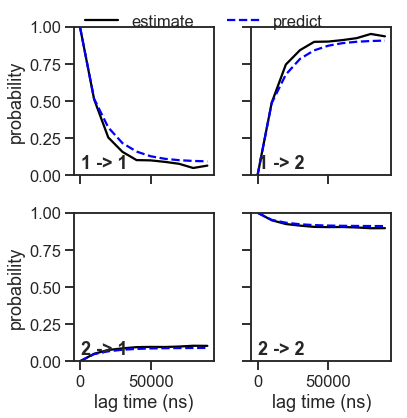

In [16]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag100ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag100ns.pdf')

In [21]:
ck_test = msm.cktest(2, mlags=(np.arange(10) * 1000/100).astype('int'))

<Figure size 432x288 with 0 Axes>

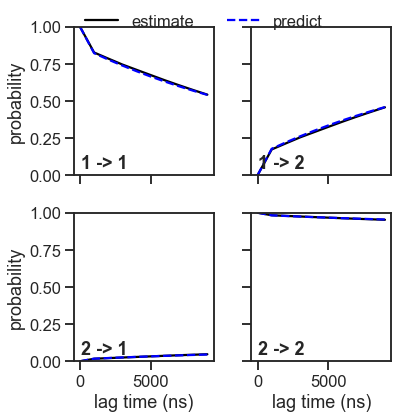

In [22]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag100ns_shortlags.png', dpi=300)
plt.savefig('ntl9_cktest_lag100ns_shortlags.pdf')

### lag 150 ns

In [23]:
#msm = pyemma.msm.bayesian_markov_model(dtrajs, 150*5)
msm = pyemma.msm.estimate_markov_model(dtrajs, 150*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 10000/150).astype('int'))

<Figure size 432x288 with 0 Axes>

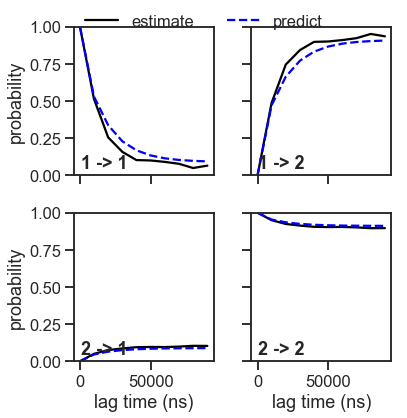

In [24]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag150ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag150ns.pdf')

In [25]:
ck_test = msm.cktest(2, mlags=(np.arange(10) * 1000/150).astype('int'))

<Figure size 432x288 with 0 Axes>

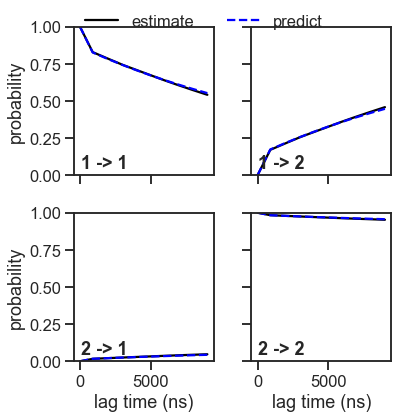

In [26]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag150ns_shortlags.png', dpi=300)
plt.savefig('ntl9_cktest_lag150ns_shortlags.pdf')

### lag 200 ns

In [27]:
#msm = pyemma.msm.bayesian_markov_model(dtrajs, 200*5)
msm = pyemma.msm.estimate_markov_model(dtrajs, 200*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 10000/200).astype('int'))

<Figure size 432x288 with 0 Axes>

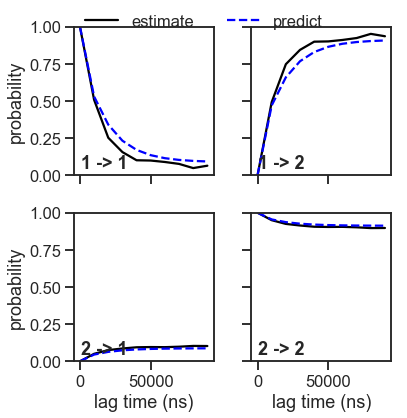

In [28]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag200ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag200ns.pdf')

In [29]:
ck_test = msm.cktest(2, mlags=(np.arange(10) * 1000/200).astype('int'))

<Figure size 432x288 with 0 Axes>

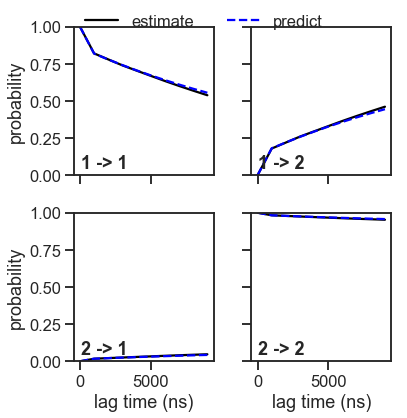

In [31]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag200ns_shortlags.png', dpi=300)
plt.savefig('ntl9_cktest_lag200ns_shortlags.pdf')